<a href="https://colab.research.google.com/github/aditisadhu/hotel-booking-eda/blob/main/Hotel_booking_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/mojtaba142/hotel-booking

Context: The City and Resort hotel are seeing high cancellation rates which is leading to lesser revenue and hotel room use.Can you help to increase revenue by mitigation of the lower cancellation rates in both hotels and also suggest some business advice to address this problem.

Please state the analytical problem statement, Factors & Hypothesis for testing, Explore & Clean data, derive useful insights,list down your assumptions. Also, is there any other prescriptive solution you can also suggest to business?

###Problem Statement:

To identify the reasons behind the high cancellation rate at The City and Resort hotels to decide plan of action to reduce it in  next 2 months.


###Factors & Hypothesis:

The following factors can be the causes of increase in cancellation rates:
1. Decrease in rating/reviews on booking sites
2. Change in management, leading to poorer guest service (will be reflected in the reviews)
3. Increase in room tariff
4. Newly developed + better priced nearby hotels
5. Sudden change in weather or bad weather predictions, affecting travelling convenience
6. Change in some hotel policies which are not customer-friendly (For eg- earlier 2 adults + 2 kids were allowed in a room but now only 3 persons max are allowed, or now breakfast is not complimentary).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Preplaced/hotel_booking.csv')

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

####Intuition:
Columns which could be affecting strongly:




In [ ]:
# % of cancelled = 1
df.groupby(['is_canceled']).size()[1] / len(df) * 100
# inference: slightly imbalanced data

37.041628277075134

([<matplotlib.patches.Wedge at 0x79671c48eef0>,
 [Text(-0.4355420495755465, 1.0101005509609093, 'Not cancelled'),
  Text(0.4355420495755469, -1.0101005509609091, 'Cancelled')],
 [Text(-0.2375683906775708, 0.5509639368877687, '63.0%'),
  Text(0.237568390677571, -0.5509639368877685, '37.0%')])

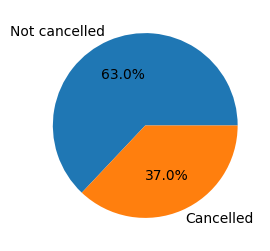

In [ ]:
plt.figure(figsize=(3,3))
plt.pie(df['is_canceled'].value_counts(), labels=['Not cancelled', 'Cancelled'], autopct="%0.1f%%")

In [ ]:
df.groupby(['hotel','is_canceled']).size() / df.groupby(['hotel']).size() *100
# inference: resort has much higher cancellation rate

hotel         is_canceled
City Hotel    0              58.273037
              1              41.726963
Resort Hotel  0              72.236645
              1              27.763355
dtype: float64

array([[<Axes: title={'center': 'is_canceled'}>]], dtype=object)

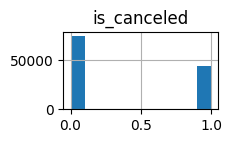

In [ ]:
df.hist(column='is_canceled', figsize=(2,1))

In [ ]:
df.hist(df['lead_time'])

KeyError: ignored